1. Demographic Filtering (마치 IMDB TOP 250)
- 가중치 점수(Weighted Rating)을 각 영화마다 구한다.
    - C(전체 영화들의 평균 점수)를 구한다.
    - m(차트 진입 최소 평가수)을 구한다.
    - WR을 구하는 함수를 만든다.
    - 각 영화마다 WR을 구하여 한 컬럼에 저장한다.
- WR을 기준으로 하여 DataFrame을 정렬한다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
movieDF = pd.read_csv('../data/processed/tmdb_4796.csv')

In [3]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4796 non-null   int64  
 1   title                 4796 non-null   object 
 2   release_date          4796 non-null   object 
 3   original_language     4796 non-null   object 
 4   overview              4795 non-null   object 
 5   cast                  4796 non-null   object 
 6   crew                  4796 non-null   object 
 7   production_countries  4707 non-null   object 
 8   keywords              4523 non-null   object 
 9   tagline               4222 non-null   object 
 10  genres                4789 non-null   object 
 11  vote_average          4796 non-null   float64
 12  vote_count            4796 non-null   int64  
 13  popularity            4796 non-null   float64
 14  runtime               4796 non-null   int64  
 15  backdrop_path        

In [4]:
### 결측치 확인
movieDF.isna().sum()

id                         0
title                      0
release_date               0
original_language          0
overview                   1
cast                       0
crew                       0
production_countries      89
keywords                 273
tagline                  574
genres                     7
vote_average               0
vote_count                 0
popularity                 0
runtime                    0
backdrop_path            181
poster_path               25
homepage                3024
dtype: int64

In [5]:
movieDF.head(2)

,id,title,release_date,original_language,overview,cast,crew,production_countries,keywords,tagline,genres,vote_average,vote_count,popularity,runtime,backdrop_path,poster_path,homepage
0,19995,Avatar,2009-12-15,en,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","United States of America, United Kingdom","future, society, culture clash, space travel, ...",Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction",7.573,29815,79.932,162,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,https://www.avatar.com/movies/avatar
1,285,Pirates of the Caribbean: At World's End,2007-05-19,en,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",United States of America,"east india company, exotic island, strong woma...","At the end of the world, the adventure begins.","Adventure, Fantasy, Action",7.239,13345,81.883,169,/kPcHuPYqzkSo4bmPHtH82GaeEgX.jpg,/jGWpG4YhpQwVmjyHEGkxEkeRf0S.jpg,https://movies.disney.com/pirates-of-the-carib...


In [6]:
### C : 전체 영화 평점 평균 
C = movieDF['vote_average'].mean()  # 6.3089376563803174

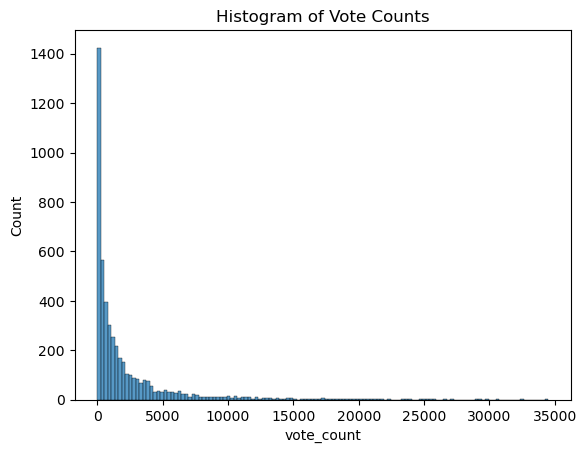

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(movieDF['vote_count'])

plt.title('Histogram of Vote Counts')
plt.show()

In [8]:
### m : 차트 진입 가능한 최소 평점수 (상위 25%까지)
m = movieDF['vote_count'].quantile(0.75)    # 2456.25

In [9]:
### 차트 진입 가능한 영화 필터링
q_movieDF = movieDF.copy().loc[movieDF['vote_count'] >= m]
q_movieDF.shape

(1199, 18)

In [10]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']    # 평점 개수
    R = x['vote_average']  # 각 영화의 평균 평점
    
    return (v / (v + m)) * R + (m / (v + m)) * C

In [11]:
q_movieDF['WR'] = q_movieDF.apply(weighted_rating, axis=1)

In [12]:
### WR 기준으로 내림차순 정렬
q_movieDF = q_movieDF.sort_values('WR', ascending=False)

In [13]:
### 상위 10개 영화 확인
q_movieDF[['id', 'title', 'vote_count', 'vote_average']].head(10)

,id,title,vote_count,vote_average
1881,278,The Shawshank Redemption,24649,8.702
3333,238,The Godfather,18677,8.707
65,155,The Dark Knight,30619,8.512
3230,680,Pulp Fiction,25893,8.488
809,13,Forrest Gump,25409,8.477
95,157336,Interstellar,32571,8.417
662,550,Fight Club,27238,8.438
329,122,The Lord of the Rings: The Return of the King,22334,8.474
1818,424,Schindler's List,14594,8.573
96,27205,Inception,34495,8.364


In [14]:
### Top 100 영화들의 csv 파일에서의 인덱스 저장
top_100_indices = q_movieDF['id'].head(100).index
movieDF[['id', 'title']].loc[top_100_indices]

,id,title
1881,278,The Shawshank Redemption
3333,238,The Godfather
65,155,The Dark Knight
3230,680,Pulp Fiction
809,13,Forrest Gump
...,...,...
118,2062,Ratatouille
4261,100,"Lock, Stock and Two Smoking Barrels"
16,24428,The Avengers
1557,70,Million Dollar Baby


In [15]:
### npy 파일로 top_100_indices 저장
np.save('../data/processed/top_100_indices.npy', top_100_indices)

In [16]:
### 저장한 npy 파일을 로드
# h = np.load('../data/processed/top_100_indices.npy')

In [17]:
### Top 100 영화들의 tmdb id 저장
top_100_ids = q_movieDF['id'].head(100).values
top_100_ids[:10]

array([   278,    238,    155,    680,     13, 157336,    550,    122,
          424,  27205], dtype=int64)

In [18]:
### npy 파일로 top_100_ids 저장
np.save('../data/processed/top_100_ids.npy', top_100_ids)

In [19]:
### 저장한 npy 파일을 로드
# h = np.load('../data/processed/top_100_ids.npy')